Inicializacja środowiska.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

userDataPath = '../data/raw/users.jsonl'
productDataPath = '../data/raw/products.jsonl'
purchaseDataPath = '../data/raw/purchases.jsonl'

usersDF = pd.read_json(userDataPath, lines = True)
productsDF = pd.read_json(productDataPath, lines = True)
purchasesDF = pd.read_json(purchaseDataPath, lines = True)


## Analiza produktów

In [114]:
productsDF.head(n=5)

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99


Wyróżniamy product_id, product_name, category_path oraz price.
Szczególnie powinniśmy się przyjrzeć polu **category_path**.
Reprezentuje hierarchiczną strukturę kategorii. Patrząc od lewej do prawej, mamy najogólniejsze zkategoryzowanie kończąc na najbardziej szczegółowym. 

In [115]:
productsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     319 non-null    int64  
 1   product_name   319 non-null    object 
 2   category_path  319 non-null    object 
 3   price          319 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.1+ KB


Widzimy, że w żadnym atrybucie nie ma pustych pól, możemy o tym wnioskować z faktu, że ilość rekordów (319 : entries)  jest równa każdej z wartości w kolumnie non-null count.

Analiza **product_id**

In [116]:
print('max id : {}'.format(productsDF['product_id'].max()))
print('min id : {}'.format(productsDF['product_id'].min()))
print('unique ids : {}/{}'.format(productsDF['product_id'].nunique(), productsDF['product_id'].size))

max id : 1319
min id : 1001
unique ids : 319/319


**product_id** jest z liczbą całkowitą z przedziału [1001 - 1319].
Widzimy również, że wszystkie id są unikalne, więc nie będziemy mieć problemu z niejdnoznacznością w przyadku produktów.

Analiza **product_name**

In [117]:
print('unique names : {}/{}'.format(productsDF['product_name'].nunique(), productsDF['product_name'].size))

unique names : 319/319


Wszystkie nazwy produktów są unikatowe.

Analiza **category_path**

In [118]:
print(
    productsDF['category_path']
        .drop_duplicates()
        .sort_values()
        .to_string(index=False)
) 

                                    Gry i konsole;Gry komputerowe
                    Gry i konsole;Gry na konsole;Gry PlayStation3
                        Gry i konsole;Gry na konsole;Gry Xbox 360
   Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne
                                  Komputery;Monitory;Monitory LCD
                            Komputery;Tablety i akcesoria;Tablety
                                       Sprzęt RTV;Audio;Słuchawki
         Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4
                                 Sprzęt RTV;Video;Odtwarzacze DVD
               Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV
               Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące
  Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe
                          Telefony i akcesoria;Telefony komórkowe
                        Telefony i akcesoria;Telefony stacjonarne


Zbiór wszystkich unikalnych kategoryzacji występujących w naszych danych. Wartos sprawdzić jak wygląda liczność każdej z kategorii.

In [119]:
productsDF.groupby('category_path')['product_id'].count().sort_values()

category_path
Sprzęt RTV;Audio;Słuchawki                                             1
Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D                     1
Telefony i akcesoria;Telefony stacjonarne                              1
Komputery;Tablety i akcesoria;Tablety                                  2
Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4               2
Sprzęt RTV;Video;Odtwarzacze DVD                                       2
Telefony i akcesoria;Telefony komórkowe                                2
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe        4
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące      5
Gry i konsole;Gry na konsole;Gry PlayStation3                          9
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne         9
Komputery;Monitory;Monitory LCD                                       17
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                    30
Gry i konsole;Gry na konsole;Gry Xbox

Widzimy, że bardzo liczną grupą jest **'Gry i konsole;Gry komputerowe**. Nie jesteśmy w stanie podzielić jej na mniejsze, ale możemy spróbować scalić grupy o wspónych 'prefikasch'.

In [120]:
productsDF['category_path'].drop_duplicates().sort_values(ignore_index=True)

0                                         Gry i konsole;Gry komputerowe
1                         Gry i konsole;Gry na konsole;Gry PlayStation3
2                             Gry i konsole;Gry na konsole;Gry Xbox 360
3        Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne
4                                       Komputery;Monitory;Monitory LCD
5                                 Komputery;Tablety i akcesoria;Tablety
6                                            Sprzęt RTV;Audio;Słuchawki
7              Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4
8                                      Sprzęt RTV;Video;Odtwarzacze DVD
9                    Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV
10                   Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D
11    Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące
12      Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe
13                              Telefony i akcesoria;Telefony ko

Łatwiej będzie nam zrzutować posortowane kategorie.

Sensownym było by wyróżnić 5 categorii o następujących licznościach:
- 'Gry komputerowe' : 202 
- 'Gry na konsole' : 41
- 'Sprzęt RTV' : 36
- 'Komputery' : 28
- 'Telefony i akcesoria' :  12

In [121]:
groups = [
    'Gry komputerowe',
    'Gry na konsole', 
    'Sprzęt RTV', 
    'Komputery', 
    'Telefony i akcesoria'
    ]

def castCategory(category_path):
    categories = category_path.split(';')
    casts = [sub_category for sub_category in categories if sub_category in groups]
    if (len(casts) != 1):
        raise RuntimeError('number of casts should be 1 but is : {}'.format(casts))
    return casts[0]

productsDF_processed = productsDF['category_path'].apply(castCategory)
productsDF_processed.value_counts()

Gry komputerowe         202
Gry na konsole           41
Sprzęt RTV               36
Komputery                28
Telefony i akcesoria     12
Name: category_path, dtype: int64

Wynik rzutowania zgadza zgadza się z naszymi wstępnymi szacunkami.

Analiza **price**

max price : 7639.0
max price : 1.0
mean price : 247.78796238244504
median price : 41.0


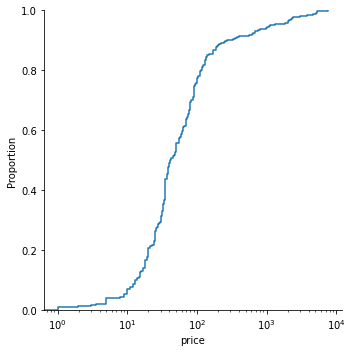

In [122]:
print('max price : {}'.format(productsDF['price'].max()))
print('max price : {}'.format(productsDF['price'].min()))
print('mean price : {}'.format(productsDF['price'].mean()))
print('median price : {}'.format(productsDF['price'].median()))

sbn.displot(data=productsDF, x='price', kind='ecdf', log_scale=True)


<AxesSubplot:xlabel='price'>

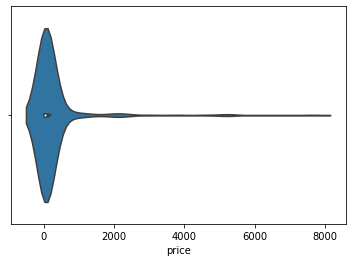

In [123]:
sbn.violinplot(data=productsDF, x='price')

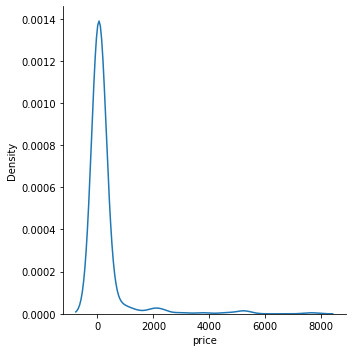

In [124]:
sbn.displot(data=productsDF, x='price', kind='kde')


Po dystrybuancie widzimy, że większość cen produktów znajduje się w przedziale [0, 300], około 90%.

## Analiza użytkowników

In [125]:
usersDF.head(n=5)

,user_id,name,city,street
0,102,Ernest Zacharek,Radom,ul. Bukowa 64
1,103,Tomasz Elwart,Gdynia,ul. Bałtycka 29
2,104,Jakub Machowiak,Poznań,pl. Nałkowskiej 64/51
3,105,Jan Kaziród,Wrocław,plac Borowa 70
4,106,Adrianna Pera,Radom,aleja Wiązowa 30/27


Rekord użytkownika zawiera pola user_id, name, city, street

In [126]:
usersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  200 non-null    int64 
 1   name     200 non-null    object
 2   city     200 non-null    object
 3   street   200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


Brak pustych pól w zbiorze użytkowników.

Analiza **user_id**

In [127]:
print('max id : {}'.format(usersDF['user_id'].max()))
print('min id : {}'.format(usersDF['user_id'].min()))
print('unique ids : {}/{}'.format(usersDF['user_id'].nunique(), usersDF['user_id'].size))

max id : 301
min id : 102
unique ids : 200/200


Id są z liczbami całkowitymi z przedziału [102, 301]. Nie mam żadnych duplikatów. Jeżeli nazwy użytkowników będą unikalne będziemy mieć pewność, że nie mamy niejednoznaczności dotyczącej użytkownika.

In [128]:
print('unique names : {}/{}'.format(usersDF['name'].nunique(), usersDF['user_id'].size))

unique names : 199/200


In [129]:
usersDF[usersDF['name'].duplicated(keep=False)]

,user_id,name,city,street
102,204,Fryderyk Pospiech,Radom,al. Piastowska 50
158,260,Fryderyk Pospiech,Wrocław,pl. Akacjowa 25


Imiona nie są unikatowe. Wygląda na to, że klient pozwala na zakładanie wielu kont dla jednej osoby.
Wydaje się, że nie jest to problemem, warto również wspomnieć, że wartość name raczej nie będzie użyteczna w procesie trenowania modelu.

Analiza **city**

Warto sprawdzić, czy użytkownicy są reprezentatwyną grupą w kontekście działalności obszaru działalności klienta. Chcielibyśmy by model działał poprawnie dla wszystkich, miast w których operuje ESzopping, więc liczymy na to, że użytkownicy będą rozłożeni w równolicznych grupach.

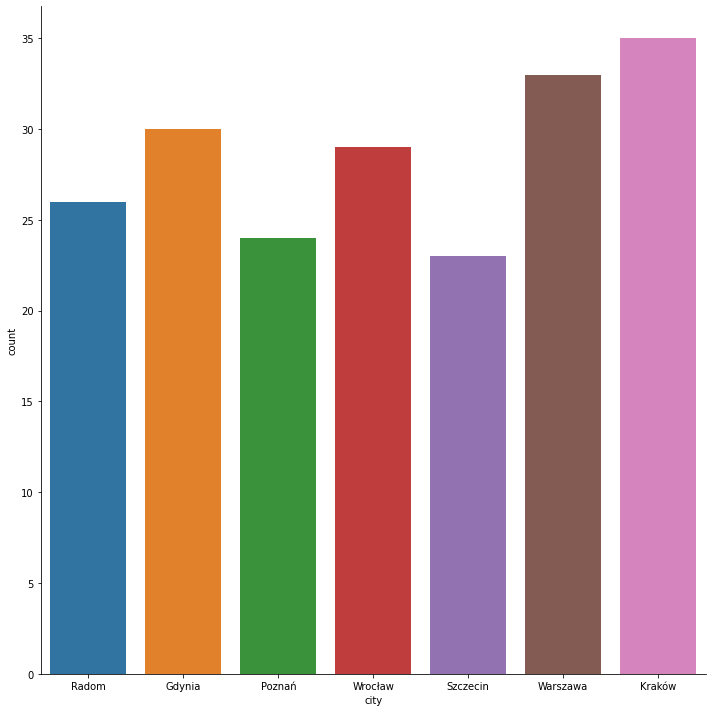

In [130]:
sbn.catplot(data=usersDF, kind='count', x='city', height=10)

Pomijając delikatną przewagę Warszawy i Krakowa mad resztą 'stawki', nie widzimy poważnych niereguralności w mieście zamieszkania użytkowników. 

Analiza **street**

In [131]:
print('unique streets : {}/{}'.format(usersDF['street'].nunique(), usersDF['user_id'].size))

unique streets : 200/200


Wszystkie nazwy ulic są unikatowe.

**street** i **city** będą ważnymi atrybutami dla naszego modelu. Nie trudno się domyśleć, że adres doręczenia przesyłki będzie grał ważną rolę przy predykcji.

## Analiza zakupów

In [132]:
purchasesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7031 entries, 0 to 7030
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   purchase_id         7031 non-null   int64 
 1   purchase_timestamp  7031 non-null   object
 2   delivery_timestamp  7031 non-null   object
 3   delivery_company    7031 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 219.8+ KB


Rekordy są kompletne.
Sprawdźmy jakie dane są zapisane w rekordach.

In [133]:
purchasesDF.head(n=5)

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2021-09-20T14:30:28,2021-09-22T08:36:20.150497,360
1,20002,2021-03-05T13:27:41,2021-03-08T08:00:32.317562,620
2,20003,2021-07-28T13:44:26,2021-07-30T12:01:54.224889,360
3,20004,2021-09-01T18:54:49,2021-09-03T08:09:57.431414,360
4,20005,2021-09-11T12:33:54,2021-09-13T08:42:19.687349,360


Atrybuty **purchase_id** oraz **delivery_company** są identyfikatorami, więc łatwo będzie je przeanalizować.
**purchase_timestamp** i **delivery_timestamp**, a wręcz ich różnica będzie przedmiotem predykcji, więc warto będzie przyjrzeć się tym atrybutom trochę bliżej.

Analiza **purchase_id**

In [134]:
print('max id : {}'.format(purchasesDF['purchase_id'].max()))
print('min id : {}'.format(purchasesDF['purchase_id'].min()))
print('unique ids : {}/{}'.format(purchasesDF['purchase_id'].nunique(), purchasesDF['purchase_id'].size))

max id : 27031
min id : 20001
unique ids : 7031/7031


Id są unikatowe oraz w pełni pokrywają przedział [20001, 27031].

Analiza **delivery_company**

In [135]:
print('max id : {}'.format(purchasesDF['delivery_company'].max()))
print('min id : {}'.format(purchasesDF['delivery_company'].min()))
print('unique ids : {}/{}'.format(purchasesDF['delivery_company'].nunique(), purchasesDF['purchase_id'].size))

max id : 620
min id : 360
unique ids : 3/7031


Widzimy, że ESzopping współpracuje jedynie z 3 firmami kurierskimi.

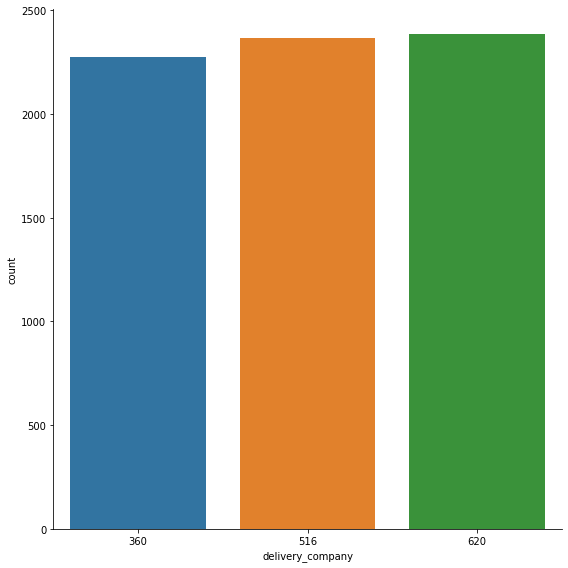

In [136]:
sbn.catplot(data=purchasesDF, kind='count', x='delivery_company', height=8)

Na podstawie powyższego histogramu widzimy, że firmy maja praktycznie idenyczne obciążenie. Jest to przesłanka za tym, że dane są reprezentatywne, warto by sprawdzić, czy również w obrębie poszczególnych miast sytuacja wygląda tak samo. To sprawdzenie odroczymy do czasu scalenia danych.

Analiza **delivery_timestamp**, **purchase_timestamp**

Dodamy nowe pole informacyjne **delivery_time** będące różnicą **purchase_timestamp** i **delivery_timestamp** oraz **week_day** informujący o dniu tygodnia [0, 6]

In [190]:
import dateutil.parser as dt
delivery_time = [0 for i in range(0, len(purchasesDF.index))]
week_day = [0 for i in range(0, len(purchasesDF.index))]

for index, row in purchasesDF.iterrows():
    end = row['delivery_timestamp']
    beg = row['purchase_timestamp']
    
    week_day[index] = dt.isoparse(beg).weekday()
    
    time = dt.isoparse(end) - dt.isoparse(beg)
    time = time.days * 24 + time.seconds / 3600
    delivery_time[index] = time

purchasesDF_processed = purchasesDF.copy()
purchasesDF_processed['delivery_time'] = delivery_time
purchasesDF_processed['week_day'] = week_day

purchasesDF_processed.head(n=5)

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,delivery_time,week_day
0,20001,2021-09-20T14:30:28,2021-09-22T08:36:20.150497,360,42.097778,0
1,20002,2021-03-05T13:27:41,2021-03-08T08:00:32.317562,620,66.547500,4
2,20003,2021-07-28T13:44:26,2021-07-30T12:01:54.224889,360,46.291111,2
3,20004,2021-09-01T18:54:49,2021-09-03T08:09:57.431414,360,37.252222,2
4,20005,2021-09-11T12:33:54,2021-09-13T08:42:19.687349,360,44.140278,5


Sprawdźmy, czy mamy korelację między dniem zakupu, a czasem dostawy. Wydaje się, że powinniśmy otrzymać odpowiedź twierdzącą.

In [196]:
from scipy.stats import pearsonr

corr, _ = pearsonr(purchasesDF_processed['week_day'], purchasesDF_processed['delivery_time'])

print('Pearsons correlation is : {}'.format(corr))

Pearsons correlation is : 0.09222263163825788


Jednak brak korelacji.

Sprawdźmy, czy osoby zamawiające tuż przed weekendem, albo w jego trakcie, czekają dłużej niż osoby z początku tygodnia.

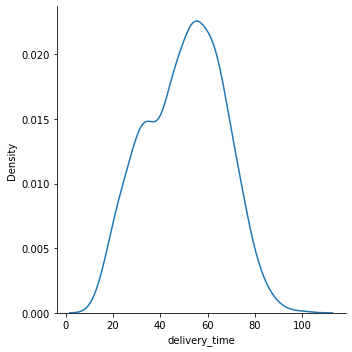

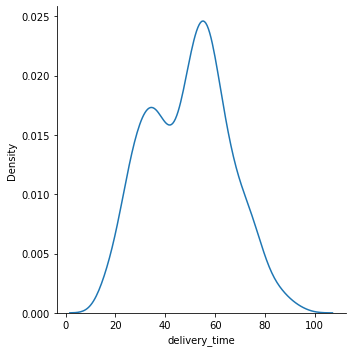

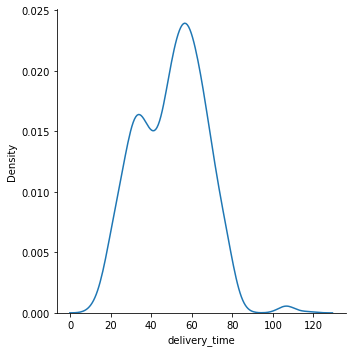

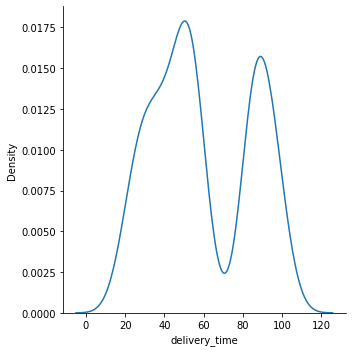

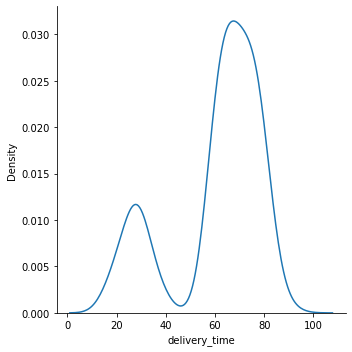

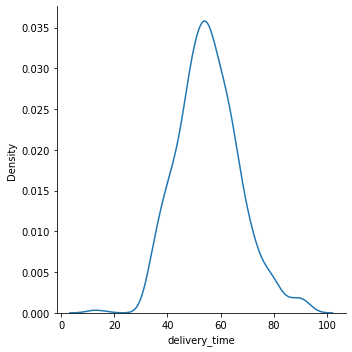

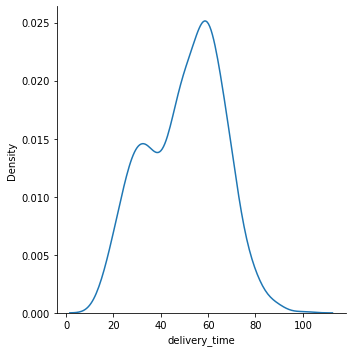

In [214]:
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==0], x='delivery_time', kind='kde')
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==1], x='delivery_time', kind='kde')
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==2], x='delivery_time', kind='kde')
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==3], x='delivery_time', kind='kde')
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==4], x='delivery_time', kind='kde')
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==5], x='delivery_time', kind='kde')
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==6], x='delivery_time', kind='kde')



Rozkłady żadnego z dni nie są normalne. Możemy zauważyć, że począwszy od poniedziałku 'szczyt' wykresu przesuwa się ku prawej stronie, czyli dłuższy czasom przesyłki.
Może to wynikać z faktu, że w weekendy zwykle nie są traktowane jako dni robocze, co przedłuża przesyłkę. Okres oczekiwania skraca się w miarę dochodzenia do końca tygodnia
ponieważ, kończy się weekend. Warto wziąć to pod uwagę.

## Analiza sesji